In [1]:
data = read.csv("data.csv", header=F)

x <- seq(0,1, length=65)
y <- seq(0,1, length=65)
z <- matrix(0, 400, 64*64)
par(mar=c(0.01, 0.01, 0.01, 0.01), mfrow=c(10,10), pin=c(0.6, 0.6)) 
for(i in 1:400){
    z1 <- as.numeric(data[i,])
    z1 <- matrix(z1, nrow = 64)
    z1 <- z1[, 64:1]
    z[i, ] <- matrix(z1, nrow = 1)
    z1 <- matrix(z1, nrow = 64)
    # image(x, y, z1 , col=grey(seq(0, 1, length=256)), axes=FALSE)
}

In [2]:
x <- seq(0,1, length=65)
y <- seq(0,1, length=65)
z.cmeans <- colMeans(z) 
z.center <- sweep(z, 2, z.cmeans, "-")
par(mar=c(0.01, 0.01, 0.01, 0.01), mfrow=c(10,10),pin=c(0.6, 0.6)) 
for( i in 1:400){
    z1 <- z.center[i, ]
    z1 <- matrix(z1, nrow = 64)
    # image(x, y, z1 , col=grey(seq(0, 1, length=256)), axes=FALSE)
}

In [3]:
index1 <- matrix(TRUE, 10, 40)
index1[1, ] <- FALSE
index1 <- c(index1)

z.tr <- z[index1, ]
z.te <- z[!index1, ]
#z.tr.scale <- scale(z.tr)
z.tr.means <- colMeans(z.tr) 
z.center <- sweep(z, 2, z.tr.means, "-")

# Step 2: calculate covariance matrix
z.tr.var <- cov(z.tr)
eigs <- eigen(z.tr.var)

[1] 0.8995921


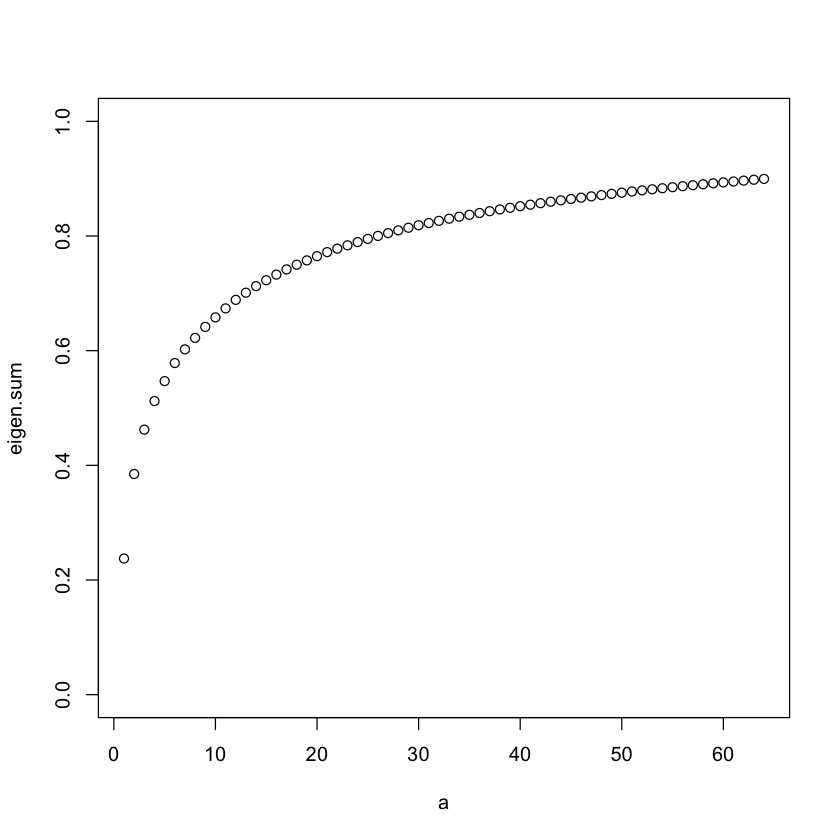

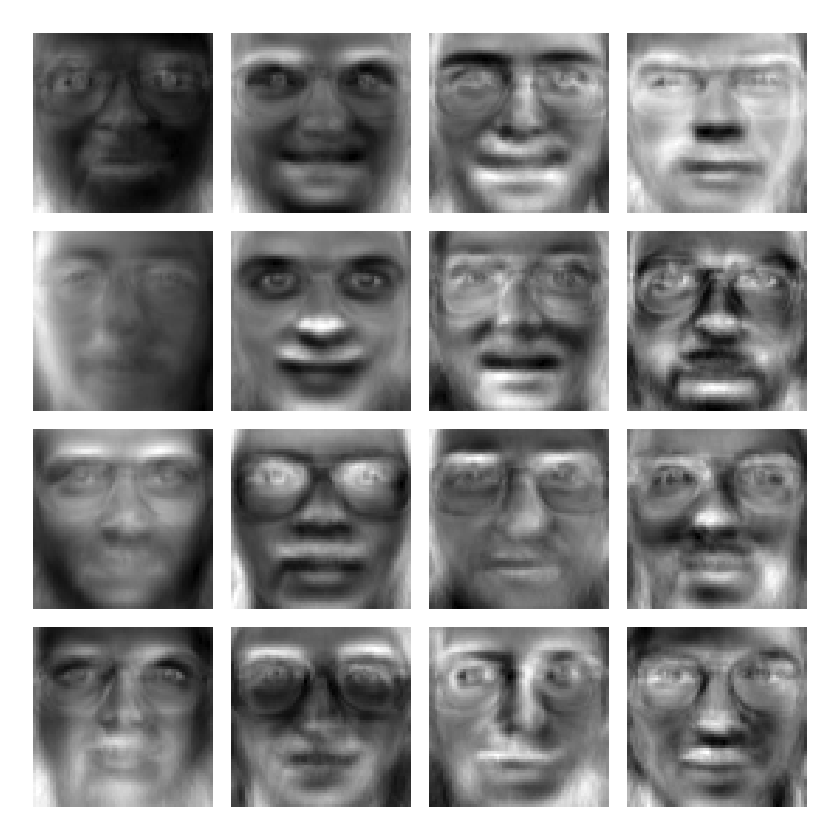

In [4]:
k <- 64
eigenvalues <- eigs$values
eigenvectors <- eigs$vectors[,1:k, drop=FALSE]
print(sum(eigenvalues[1:k])/sum(eigenvalues))
#eigenvectors[,10]
a <- 1:64
eigen.sum <- rep(0, 64)
for( i in 1:64){
   eigen.sum[i] <- sum(eigenvalues[1:i])/sum(eigenvalues)
}

plot(a, eigen.sum,ylim = c(0,1))
par(mar=c(0.01,0.01,0.01,0.01), mfcol=c(4,4), 
    omi=c(0.2, 0.2, 0.2, 0.2), pin=c(1.5, 1.5)) 
k <- 16
for( i in 1:k){
    eigenvector <- eigenvectors[,i]
    eigenvector <- matrix(eigenvector, nrow = 64)
    image(x, y, eigenvector , col=grey(seq(0, 1, length=256)), 
          axes=FALSE, xlab="", ylab="")
}

[1] 0.2374707 0.3849159 0.4622344 0.5121039 0.5469061 0.5784528 0.6022488
 [8] 0.6222537 0.6414988 0.6580614 0.6737526 0.6886086 0.7010983 0.7124942
[15] 0.7228475 0.7326516 0.7416985 0.7498940 0.7574599 0.7648706 0.7718902
[22] 0.7779980 0.7837509 0.7893941 0.7949441 0.8001396 0.8050397 0.8098652
[29] 0.8144135 0.8187391 0.8226426 0.8264529 0.8301792 0.8336453 0.8369413
[36] 0.8401280 0.8432454 0.8463061 0.8491614 0.8519805 0.8546297 0.8572394
[43] 0.8597755 0.8621661 0.8645226 0.8668390 0.8691225 0.8713521 0.8734969
[50] 0.8755802 0.8776091 0.8795692 0.8814734 0.8833341 0.8851395 0.8868817
[57] 0.8885924 0.8902622 0.8918980 0.8934975 0.8950718 0.8966181 0.8981102
[64] 0.8995921

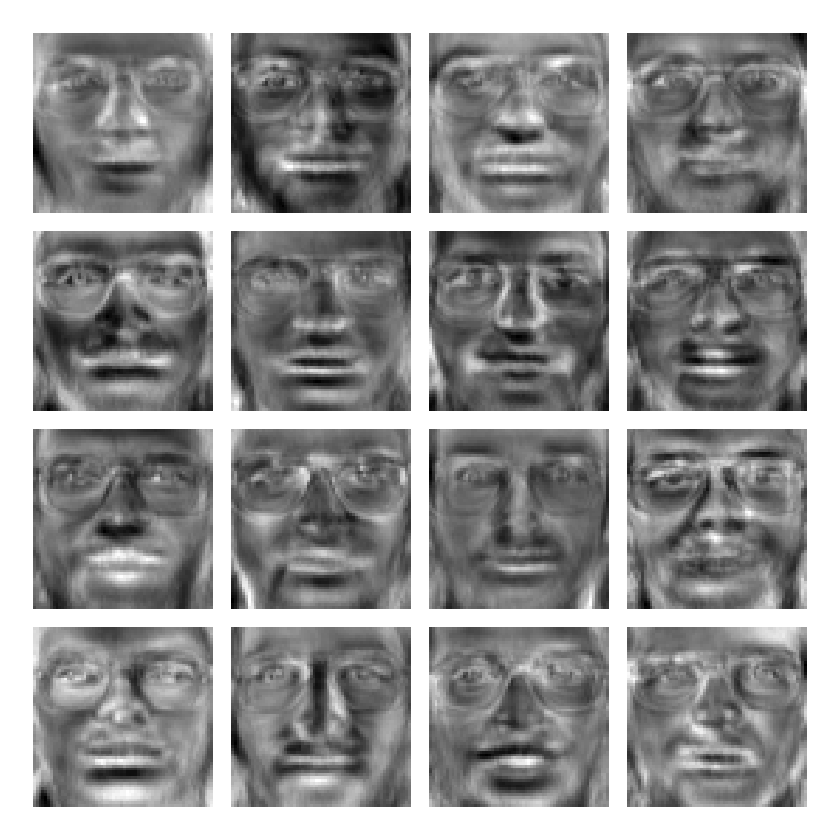

In [5]:
par(mar=c(0.01,0.01,0.01,0.01), mfcol=c(4,4), 
    omi=c(0.2, 0.2, 0.2, 0.2), pin=c(1.5, 1.5)) 
k <- 16
for( i in 17:32){
    eigenvector <- eigenvectors[,i]
    eigenvector <- matrix(eigenvector, nrow = 64)
    image(x, y, eigenvector , col=grey(seq(0, 1, length=256)), 
          axes=FALSE, xlab="", ylab="")
}

eigen.sum

k = 4

In [6]:
z.dim <- dim(z)
z.op <- t(matrix(z.tr.means, nrow = z.dim[2], ncol = z.dim[1]))

k <- 4
eigenvalues <- eigs$values
eigenvectors <- eigs$vectors[, 1:k, drop=FALSE]
print("% of var")
print(sum(eigenvalues[1:k])/sum(eigenvalues))

for(i in 1:k){
    eigenvector <- eigenvectors[,i]
    eigenvector <- outer(eigenvector, eigenvector)
    z.op.i <- z.center %*% eigenvector
#    z.op.i <- outer(z.pc.i, eigenvector, "*")
    z.op <- z.op + z.op.i
}

z.op.mean <- matrix(0, 80, 4096)
for(i in 1:40){
    z.op.mean[2*(i-1)+1, ] = z.op[10*(i-1)+1, ]
    z.op.mean[2*(i), ] =apply(z.op[ (10*(i-1)+2):(10*i), ], 2, mean)
} 
par(mar=c(0.01,0.01,0.01,0.01), mfrow=c(10,2),pin=c(0.6, 0.6)) 
for( i in 1:80){
    z1 <- z.op.mean[i, ]
    z1 <- matrix(z1, nrow = 64)
#     image(x, y, z1 , col=grey(seq(0, 1, length=256)), 
#           axes=FALSE, xlab = "", ylab="")
}

z.tr.pc <- z.tr %*% eigenvectors
z.te.pc <- z.te %*% eigenvectors

index0 <- rep(1:40, rep(9,40))
library(plyr)
z.tr.pc.mean <- daply(as.data.frame(z.tr.pc), .(index0), colMeans)


disM <- matrix(0, 40, 40)
for(i in 1:40){
    disM[, i] <- apply((sweep(z.tr.pc.mean, 2, z.te.pc[i, ], "-"))^2, 1, sum)
}
print("err%")
print(mean((1:40) != (apply(disM,2,which.min))))
print((1:40) != (apply(disM,2,which.min)))
apply(disM,2,which.min)

[1] "% of var"
[1] 0.5121039
[1] "err%"
[1] 0.575
 [1]  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[13]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
[25] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
[37] FALSE  TRUE FALSE  TRUE


[1] 16  2 26  4  9  8  7  8  9 25 32 23  3 14  2  2 12  8 28 30 29 22 23 15 25
[26] 26 27 28 39 30 21 11 33 34 30  7 37 40 39 38

k = 8

In [7]:
z.dim <- dim(z)
z.op <- t(matrix(z.tr.means, nrow = z.dim[2], ncol = z.dim[1]))

k <- 8
eigenvalues <- eigs$values
eigenvectors <- eigs$vectors[, 1:k, drop=FALSE]
print("% of var")
print(sum(eigenvalues[1:k])/sum(eigenvalues))

for(i in 1:k){
    eigenvector <- eigenvectors[,i]
    eigenvector <- outer(eigenvector, eigenvector)
    z.op.i <- z.center %*% eigenvector
#    z.op.i <- outer(z.pc.i, eigenvector, "*")
    z.op <- z.op + z.op.i
}

z.op.mean <- matrix(0, 80, 4096)
for(i in 1:40){
    z.op.mean[2*(i-1)+1, ] = z.op[10*(i-1)+1, ]
    z.op.mean[2*(i), ] =apply(z.op[ (10*(i-1)+2):(10*i), ], 2, mean)
} 
par(mar=c(0.01,0.01,0.01,0.01), mfrow=c(10,2),pin=c(0.6, 0.6)) 
for( i in 1:80){
    z1 <- z.op.mean[i, ]
    z1 <- matrix(z1, nrow = 64)
#     image(x, y, z1 , col=grey(seq(0, 1, length=256)), 
#           axes=FALSE, xlab = "", ylab="")
}

z.tr.pc <- z.tr %*% eigenvectors
z.te.pc <- z.te %*% eigenvectors

index0 <- rep(1:40, rep(9,40))
library(plyr)
z.tr.pc.mean <- daply(as.data.frame(z.tr.pc), .(index0), colMeans)


disM <- matrix(0, 40, 40)
for(i in 1:40){
    disM[, i] <- apply((sweep(z.tr.pc.mean, 2, z.te.pc[i, ], "-"))^2, 1, sum)
}
print("err%")
print(mean((1:40) != (apply(disM,2,which.min))))
print((1:40) != (apply(disM,2,which.min)))
apply(disM,2,which.min)

[1] "% of var"
[1] 0.6222537
[1] "err%"
[1] 0.3
 [1]  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE
[37] FALSE  TRUE FALSE  TRUE


[1] 16  2 26  4  5 18  7  8  9 10 11 12 13 14 15 15 17 18 19 30 30 22 23 24 25
[26] 26 27 28 39 30 21 32 33 34 30  7 37 40 39  9

k = 16

In [8]:
z.dim <- dim(z)
z.op <- t(matrix(z.tr.means, nrow = z.dim[2], ncol = z.dim[1]))

k <- 16
eigenvalues <- eigs$values
eigenvectors <- eigs$vectors[, 1:k, drop=FALSE]
print("% of var")
print(sum(eigenvalues[1:k])/sum(eigenvalues))

for(i in 1:k){
    eigenvector <- eigenvectors[,i]
    eigenvector <- outer(eigenvector, eigenvector)
    z.op.i <- z.center %*% eigenvector
#    z.op.i <- outer(z.pc.i, eigenvector, "*")
    z.op <- z.op + z.op.i
}

z.op.mean <- matrix(0, 80, 4096)
for(i in 1:40){
    z.op.mean[2*(i-1)+1, ] = z.op[10*(i-1)+1, ]
    z.op.mean[2*(i), ] =apply(z.op[ (10*(i-1)+2):(10*i), ], 2, mean)
} 
par(mar=c(0.01,0.01,0.01,0.01), mfrow=c(10,2),pin=c(0.6, 0.6)) 
for( i in 1:80){
    z1 <- z.op.mean[i, ]
    z1 <- matrix(z1, nrow = 64)
#     image(x, y, z1 , col=grey(seq(0, 1, length=256)), 
#           axes=FALSE, xlab = "", ylab="")
}

z.tr.pc <- z.tr %*% eigenvectors
z.te.pc <- z.te %*% eigenvectors

index0 <- rep(1:40, rep(9,40))
library(plyr)
z.tr.pc.mean <- daply(as.data.frame(z.tr.pc), .(index0), colMeans)


disM <- matrix(0, 40, 40)
for(i in 1:40){
    disM[, i] <- apply((sweep(z.tr.pc.mean, 2, z.te.pc[i, ], "-"))^2, 1, sum)
}
print("err%")
print(mean((1:40) != (apply(disM,2,which.min))))
print((1:40) != (apply(disM,2,which.min)))
apply(disM,2,which.min)

[1] "% of var"
[1] 0.7326516
[1] "err%"
[1] 0.175
 [1] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
[37] FALSE  TRUE FALSE  TRUE


[1]  1  2 26  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 30 22 23 24 25
[26] 26 27 28 39 30 21 32 33 34 35  7 37 40 39  9

k = 32

In [9]:
z.dim <- dim(z)
z.op <- t(matrix(z.tr.means, nrow = z.dim[2], ncol = z.dim[1]))

k <- 32
eigenvalues <- eigs$values
eigenvectors <- eigs$vectors[, 1:k, drop=FALSE]
print("% of var")
print(sum(eigenvalues[1:k])/sum(eigenvalues))

for(i in 1:k){
    eigenvector <- eigenvectors[,i]
    eigenvector <- outer(eigenvector, eigenvector)
    z.op.i <- z.center %*% eigenvector
#    z.op.i <- outer(z.pc.i, eigenvector, "*")
    z.op <- z.op + z.op.i
}

z.op.mean <- matrix(0, 80, 4096)
for(i in 1:40){
    z.op.mean[2*(i-1)+1, ] = z.op[10*(i-1)+1, ]
    z.op.mean[2*(i), ] =apply(z.op[ (10*(i-1)+2):(10*i), ], 2, mean)
} 
par(mar=c(0.01,0.01,0.01,0.01), mfrow=c(10,2),pin=c(0.6, 0.6)) 
for( i in 1:80){
    z1 <- z.op.mean[i, ]
    z1 <- matrix(z1, nrow = 64)
#     image(x, y, z1 , col=grey(seq(0, 1, length=256)), 
#           axes=FALSE, xlab = "", ylab="")
}

z.tr.pc <- z.tr %*% eigenvectors
z.te.pc <- z.te %*% eigenvectors

index0 <- rep(1:40, rep(9,40))
library(plyr)
z.tr.pc.mean <- daply(as.data.frame(z.tr.pc), .(index0), colMeans)


disM <- matrix(0, 40, 40)
for(i in 1:40){
    disM[, i] <- apply((sweep(z.tr.pc.mean, 2, z.te.pc[i, ], "-"))^2, 1, sum)
}
print("err%")
print(mean((1:40) != (apply(disM,2,which.min))))
print((1:40) != (apply(disM,2,which.min)))
apply(disM,2,which.min)

[1] "% of var"
[1] 0.8264529
[1] "err%"
[1] 0.125
 [1] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[37] FALSE  TRUE FALSE  TRUE


[1]  1  2 26  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 30 22 23 24 25
[26] 26 27 28 29 30 21 32 33 34 35 36 37 40 39  9

k = 64

In [10]:
z.dim <- dim(z)
z.op <- t(matrix(z.tr.means, nrow = z.dim[2], ncol = z.dim[1]))

k <- 64
eigenvalues <- eigs$values
eigenvectors <- eigs$vectors[, 1:k, drop=FALSE]
print("% of var")
print(sum(eigenvalues[1:k])/sum(eigenvalues))

for(i in 1:k){
    eigenvector <- eigenvectors[,i]
    eigenvector <- outer(eigenvector, eigenvector)
    z.op.i <- z.center %*% eigenvector
#    z.op.i <- outer(z.pc.i, eigenvector, "*")
    z.op <- z.op + z.op.i
}

z.op.mean <- matrix(0, 80, 4096)
for(i in 1:40){
    z.op.mean[2*(i-1)+1, ] = z.op[10*(i-1)+1, ]
    z.op.mean[2*(i), ] =apply(z.op[ (10*(i-1)+2):(10*i), ], 2, mean)
} 
par(mar=c(0.01,0.01,0.01,0.01), mfrow=c(10,2),pin=c(0.6, 0.6)) 
for( i in 1:80){
    z1 <- z.op.mean[i, ]
    z1 <- matrix(z1, nrow = 64)
#     image(x, y, z1 , col=grey(seq(0, 1, length=256)), 
#           axes=FALSE, xlab = "", ylab="")
}

z.tr.pc <- z.tr %*% eigenvectors
z.te.pc <- z.te %*% eigenvectors

index0 <- rep(1:40, rep(9,40))
library(plyr)
z.tr.pc.mean <- daply(as.data.frame(z.tr.pc), .(index0), colMeans)


disM <- matrix(0, 40, 40)
for(i in 1:40){
    disM[, i] <- apply((sweep(z.tr.pc.mean, 2, z.te.pc[i, ], "-"))^2, 1, sum)
}
print("err%")
print(mean((1:40) != (apply(disM,2,which.min))))
print((1:40) != (apply(disM,2,which.min)))
apply(disM,2,which.min)

[1] "% of var"
[1] 0.8995921
[1] "err%"
[1] 0.1
 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[37] FALSE  TRUE FALSE  TRUE


[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 30 22 23 24 25
[26] 26 27 28 29 30 21 32 33 34 35 36 37 40 39 12